### Homework 2 - Part 2 - Task 2: GMM and PCA
Gaussian Mixture Model(GMM) and PCA <br>
We will use face image dataset to build GMM model to generate new face images <br>
GMM is very slow for high dimentional data <br>
To speed-up GMM, we will apply PCA to the input images. <br>
image samples -> forward PCA -> samples in lower-dimensional space -> GMM <br>
GMM->random sampling -> new samples in lower-dimensional space -> inverse PCA -> new images <br>
This is a guided-task: <br>
You will see the output of a code cell and then figure out the code in that cell. <br>
In each code cell, there are instructions to help you. <br>
This is a very efficient and effective way to learn how to program with sk-learn <br>
see GMM_DE_Generative_Model.ipynb

In [194]:
%matplotlib inline
from IPython import display
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
sn.set(style='whitegrid')
from sklearn.mixture import GaussianMixture as GMM
from matplotlib.patches import Ellipse

Load image data

In [195]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=500)
print(faces.target_names)
print(faces.images.shape)

['George W Bush']
(530, 62, 47)


check the total number of samples/images, `N`

In [196]:
#what is N ?
N=faces.images.shape[0]
N

530

check the input dimension (the number of elements in each input sample), `M`

In [197]:
#what is M?
M=faces.images.shape[1]*faces.images.shape[2]
M

2914

Next let's plot the first 100 of these to recall exactly what we're looking at:

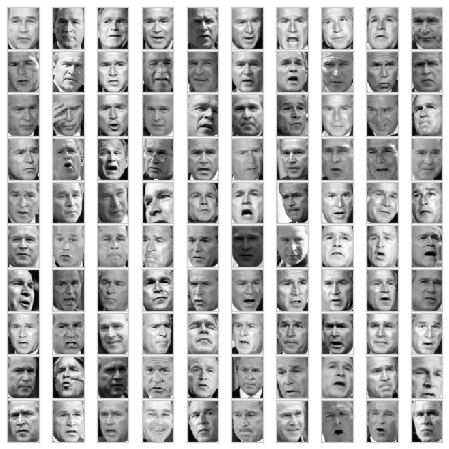

In [198]:
def plot_faces(data):
    fig, ax = plt.subplots(10, 10, figsize=(8, 8),
                           subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    for i, axi in enumerate(ax.flat):
        im = axi.imshow(data[i], cmap='gray')
plot_faces(faces.images)

We have N images, and each image has M pixels <br>
N = 530  <  M = 2914 <br>
the number of samples is smaller than the dimension <br>
We will use dimension reduction to reduce the number of features

In [199]:
# apply PCA to images
# you may need this: images.reshape(N,-1)
# set PCA paramter n_components to 120
# set whiten=True to use the normalized features
# assume data = pca.fit_transform(...)
from sklearn.decomposition import PCA
pca = PCA(n_components = 120, whiten=True)
data = pca.fit_transform(faces.images.reshape(N, -1))

In [200]:
#check the shape of data
data.shape

(530, 120)

In [201]:
#check the value of explained variance
max(np.cumsum(pca.explained_variance_ratio_))

0.9536577

Afer PCA transform, the number of features is changed from 2914 (62*47) to 120 <br>
N = 530,  data.shape[1] = 120 <br>
Now, we fit many GMM to `data` with different number of components <br>
We will select the best one based on AIC

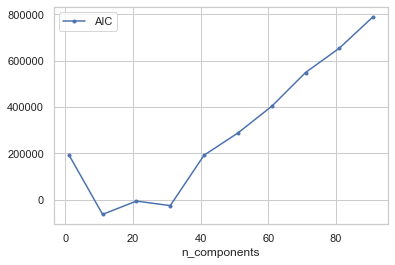

In [202]:
#fit GMM with n_components in the range of 1 to 100 with step 10
n_components = np.arange(1, 100, 10)

from sklearn.mixture import GaussianMixture
models = [GaussianMixture(n, random_state=0).fit(data)
          for n in n_components]
plt.plot(n_components, [m.aic(data) for m in models], '.-', label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

Overall, the curve keeps going up: something is weird. <br>
What will the curve be if we have more data to train GMM ? <br>
note: you may get a different curve due to some randomness in initialization.

It looks like when n_components=10, AIC reaches the minimum. <br>
Let's fit the GMM with n_components=10, and check if gmm is converged or not 

In [203]:
# you code to fit GMM
gmm = GaussianMixture(10).fit(data)
print(gmm.converged_)

True


Draw 100 new samples from the gmm <br>
The new data samples are in the 120-dimensional projected space

In [204]:
#your code to generate data_new from gmm
data_new = gmm.sample(n_samples = 100)[0]
data_new.shape
#then check the shape

(100, 120)

Finally, we can transform the 100 samples back to the original space (pca inverse) <br>
and plot some of the images in the original space <br>

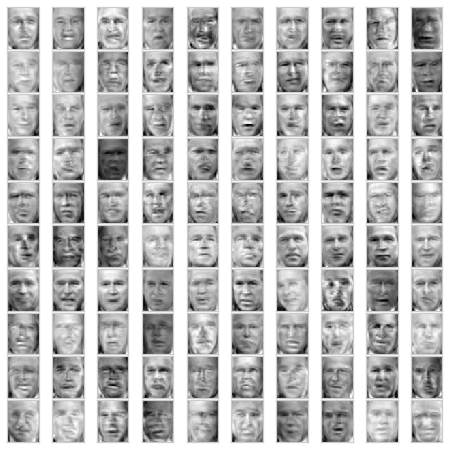

In [205]:
# your code to obtain faces_new by apply inverse pca on data_new
faces_new = pca.inverse_transform(data_new)

# show the new images
plot_faces(faces_new.reshape(-1,62, 47))

### Let's repeat the above process using more data

In [206]:
#do not change the code in this cell
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=50)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Jacques Chirac' 'Jean Chretien'
 'John Ashcroft' 'Junichiro Koizumi' 'Serena Williams' 'Tony Blair']
(1560, 62, 47)


In [207]:
#check the number of images
N = faces.images.shape[0]
N

1560

In [208]:
#check the input dimension (the number of elements in each input sample)
M=faces.images.shape[1]*faces.images.shape[2]
M

2914

We have N images, and each iamge has M pixels  <br>
N = 1560 and M = 2914 : N < M  <br>
We will use dimension reduction to reduce the number of features from 2914 to 120 <br>

In [209]:
# apply PCA to images
# set PCA paramter n_components to 120
# assume data = pca.fit_transform(...)
pca = PCA(n_components = 120, whiten=True)
data = pca.fit_transform(faces.images.reshape(N, -1))

In [210]:
#check the shape of data
data.shape

(1560, 120)

In [211]:
#check the value of explained variance
max(np.cumsum(pca.explained_variance_ratio_))

0.92901117

Now, we fit many GMMs to the transformed `data` with different number of components   <br>
We will select the best one based on AIC

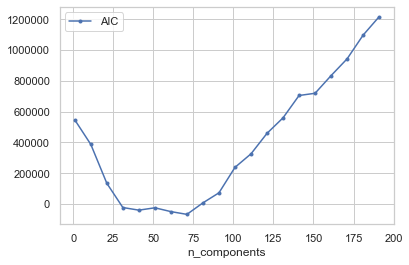

In [212]:
#fit GMM with n_components in the range of 1 to 200 with step 10
n_components = np.arange(1, 200, 10)

from sklearn.mixture import GaussianMixture
models = [GaussianMixture(n,random_state=0).fit(data)
          for n in n_components]
plt.plot(n_components, [m.aic(data) for m in models], '.-', label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

Now, we have a U-haped curve, nice. (again, you may get a different curve) <br>
It appears that AIC is miminized around 60 components. <br>
What is the exact value of n_components when AIC is minimum?

In [213]:
#find out the exact value of n_components when AIC is at its minimum
#you may get a different number due to some randomness in GMM
min([m.aic(data) for m in models])
# it happens when m=6, which is n_components=61

-67775.99569819728

Let's quickly fit GMM with n_components=61 (or other number in your file) to the `data` and confirm that it has converged:

In [214]:
# fit the GMM
gmm = GaussianMixture(61).fit(data)
print(gmm.converged_)

True


Generate 100 new samples from this GMM

In [215]:
#your code to generate data_new from gmm
data_new = gmm.sample(n_samples = 100)[0]
#then check the shape
data_new.shape

(100, 120)

Transform the 100 new samples back to the original space

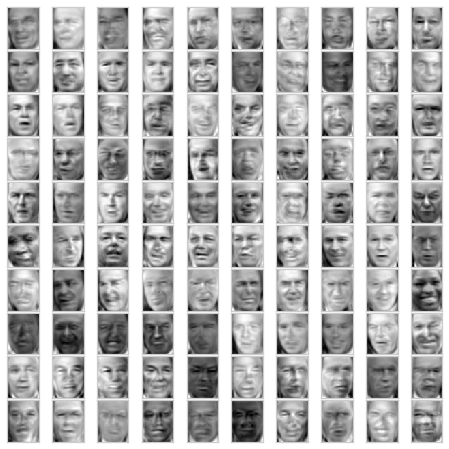

In [216]:
# your code to obtain faces_new by apply inverse pca on data_new
faces_new = pca.inverse_transform(data_new)
# show the new images
plot_faces(faces_new.reshape(-1,62, 47))

GMM is good but very time consuming. PCA+GMM is a good approach to reduce time cost.